# Car pricing project  

## Phase 1: data cleaning ##



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df1 = pd.read_csv('autos.csv', encoding = "ISO-8859-1")

In [74]:
df1.head(2)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50


In [75]:
# drop unneeded columns

df1.drop(['dateCrawled', 'offerType', 'abtest','dateCreated', 'nrOfPictures', 'postalCode','lastSeen'], inplace=True, axis=1)

In [76]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 13 columns):
name                   371528 non-null object
seller                 371528 non-null object
price                  371528 non-null int64
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dtypes: int64(5), object(8)
memory usage: 36.8+ MB


In [77]:
df1.describe()  #Minimum price is 0 for some observations

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000


### 2. Replacing outliers with null values

In [78]:
# Replacing prices below 100 with null values

df1['price'].replace(range(0,100), np.nan, inplace=True)

In [79]:
# Counting the number of null values per column

df1.isnull().sum(axis=0)

name                       0
seller                     0
price                  13320
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dtype: int64

### 3. Removing rows with null values where the value cannot be imputed

In [260]:
df2 = df1.copy()

In [262]:
df2.dropna(subset=['notRepairedDamage', 'price'], inplace=True)

In [263]:
df2.isnull().sum(axis=0)

name                       0
seller                     0
price                      0
vehicleType            15751
yearOfRegistration         0
gearbox                 6823
powerPS                    0
model                  10511
kilometer                  0
monthOfRegistration        0
fuelType               15357
brand                      0
notRepairedDamage          0
dtype: int64

In [269]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292947 entries, 1 to 371527
Data columns (total 13 columns):
name                   292947 non-null object
seller                 292947 non-null object
price                  292947 non-null float64
vehicleType            277196 non-null object
yearOfRegistration     292947 non-null int64
gearbox                286124 non-null object
powerPS                292947 non-null int64
model                  282436 non-null object
kilometer              292947 non-null int64
monthOfRegistration    292947 non-null int64
fuelType               277590 non-null object
brand                  292947 non-null object
notRepairedDamage      292947 non-null object
dtypes: float64(1), int64(4), object(8)
memory usage: 31.3+ MB


### Imputing missing model values

In [264]:
models = list(df2['model'].unique())
del models[0]

In [268]:
dftest = df2.copy()

In [270]:
dftest.drop(dftest.index[:291947], inplace=True)

In [272]:
dftest.isnull().sum(axis=0)

name                    0
seller                  0
price                   0
vehicleType            54
yearOfRegistration      0
gearbox                15
powerPS                 0
model                  33
kilometer               0
monthOfRegistration     0
fuelType               50
brand                   0
notRepairedDamage       0
dtype: int64

In [274]:
for model in models:
    for index, row in dftest[dftest['model'].isnull()].iterrows():
        if model in row['name'].lower():
            row['model'] = model
            dftest.set_value(index, 'model', model)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys


In [275]:
dftest.isnull().sum(axis=0)

name                    0
seller                  0
price                   0
vehicleType            54
yearOfRegistration      0
gearbox                15
powerPS                 0
model                  14
kilometer               0
monthOfRegistration     0
fuelType               50
brand                   0
notRepairedDamage       0
dtype: int64

In [276]:
for model in models:
    for index, row in df2[df2['model'].isnull()].iterrows():
        if model in row['name'].lower():
            row['model'] = model
            df2.set_value(index, 'model', model)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


In [294]:
df2['model'].isnull().sum(axis=0) #missing models reduced from 10,511 to 3,513

3513

In [295]:
df2.dropna(subset=['model'], inplace=True) #removing all the remaining missing value rows

In [296]:
df2['model'].isnull().sum(axis=0)

0

### Imputing missing vehicle type

In [297]:
# Counting vehType by car model
bymodel = df2[['model', 'vehicleType']]
pivot = bymodel.pivot_table(index='model', columns='vehicleType', aggfunc=len, fill_value=0)
pivot.head()

vehicleType,andere,bus,cabrio,coupe,kleinwagen,kombi,limousine,suv
model,,,,,,,,
100,3,7,4,4,7,81,223,1
107,0,0,0,0,4,0,2,0
145,1,0,1,3,13,0,12,0
147,6,0,0,29,73,3,342,0
156,1,0,0,4,2,249,225,0


In [298]:
# Saving the pivot table as dictionary
d = dict(pivot.idxmax(axis=1))

In [299]:
df3 = df2.copy()

In [300]:
# Filling empty vehicleType with most frequent values from d
df3['vehicleType'] = df3['vehicleType'].fillna(df3['model'].map(d))
df3.isnull().sum(axis=0)

name                       0
seller                     0
price                      0
vehicleType                0
yearOfRegistration         0
gearbox                 6565
powerPS                    0
model                      0
kilometer                  0
monthOfRegistration        0
fuelType               14585
brand                      0
notRepairedDamage          0
dtype: int64

### Imputing missing gearbox

In [301]:
# Counting gearbox by car model

bymodel = df2[['model', 'gearbox']]
pivot = bymodel.pivot_table(index='model', columns='gearbox', aggfunc=len, fill_value=0)
pivot.head()

gearbox,automatik,manuell
model,,
100,54,280
107,2,5
145,0,32
147,26,460
156,39,453


In [303]:
# Saving the pivot table as dictionary
d = dict(pivot.idxmax(axis=1))

In [306]:
# Filling empty gearbox with most frequent values from d
df3['gearbox'] = df3['gearbox'].fillna(df3['model'].map(d))
df3['gearbox'].isnull().sum(axis=0)

0

### Imputing missing fuel type

In [314]:
df3['fuelType'].unique()

array(['diesel', 'benzin', 'lpg', 'andere', 'hybrid', 'cng', 'elektro'],
      dtype=object)

In [315]:
# Replacing 'other' with null values

df3['fuelType'].replace('andere', np.nan, inplace=True)

In [316]:
# Counting fuel type by car model

bymodel = df2[['model', 'fuelType']]
pivot = bymodel.pivot_table(index='model', columns='fuelType', aggfunc=len, fill_value=0)
pivot.head()

fuelType,andere,benzin,cng,diesel,elektro,hybrid,lpg
model,,,,,,,
100,1,290,6,12,0,0,10
107,0,6,0,0,0,0,0
145,0,32,0,0,0,0,0
147,0,346,0,115,0,0,15
156,0,308,0,145,0,0,15


In [317]:
# Saving the pivot table as dictionary
d = dict(pivot.idxmax(axis=1))

In [319]:
# Filling empty gearbox with most frequent values from d
df3['fuelType'] = df3['fuelType'].fillna(df3['model'].map(d))
df3['fuelType'].isnull().sum(axis=0)

0

In [322]:
df3.isnull().sum(axis=0)

name                   0
seller                 0
price                  0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dtype: int64

### Imputing missing powerPS

In [338]:
# Replacing 'other' with null values
df3['powerPS'].replace(0, np.nan, inplace=True)

In [340]:
# Counting power by car model
bymodel = df3[['model', 'powerPS']]
pivot = bymodel.pivot_table(index='model', columns='powerPS', aggfunc=len, fill_value=0)
pivot.head()

powerPS,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,15020.0,15033.0,16311.0,16312.0,17322.0,17410.0,17700.0,19208.0,19312.0,20000.0
model,,,,,,,,,,,,,,,,,,,,,
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Cleaning year and month of registration

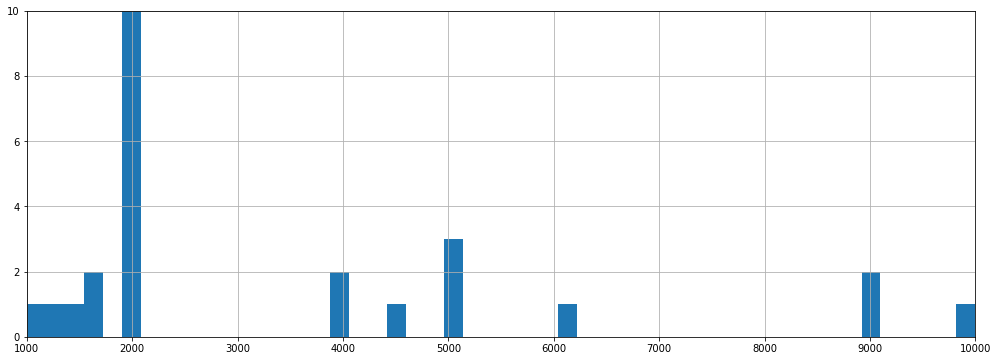

In [325]:
plt.figure(figsize=(17,6))
plt.axis([1000, 10000, 0, 10])
df3['yearOfRegistration'].hist(bins=50)

In [327]:
df3['yearOfRegistration'].replace(range(2017,10000), np.nan, inplace=True)
df3['yearOfRegistration'].replace(range(0,1950), np.nan, inplace=True)

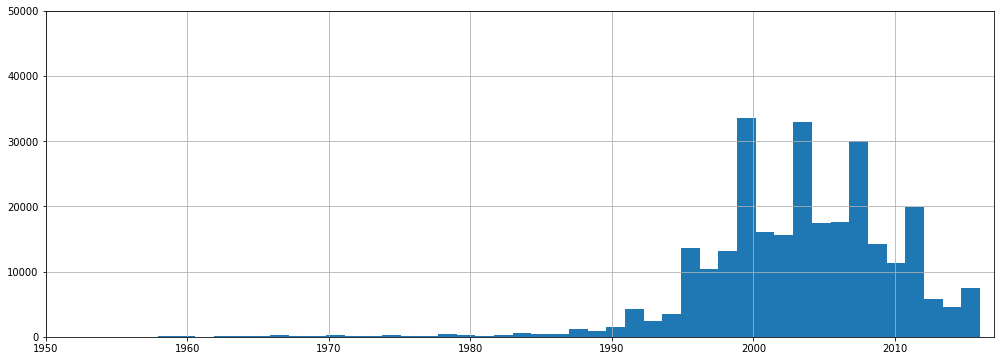

In [331]:
plt.figure(figsize=(17,6))
plt.axis([1950, 2017, 0, 50000])
df3['yearOfRegistration'].hist(bins=50)

In [332]:
df3['yearOfRegistration'].replace(range(0,1980), np.nan, inplace=True)

In [334]:
df3.dropna(subset=['yearOfRegistration'], inplace=True)

In [335]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279316 entries, 1 to 371527
Data columns (total 13 columns):
name                   279316 non-null object
seller                 279316 non-null object
price                  279316 non-null float64
vehicleType            279316 non-null object
yearOfRegistration     279316 non-null float64
gearbox                279316 non-null object
powerPS                279316 non-null int64
model                  279316 non-null object
kilometer              279316 non-null int64
monthOfRegistration    279316 non-null int64
fuelType               279316 non-null object
brand                  279316 non-null object
notRepairedDamage      279316 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 29.8+ MB


In [336]:
df3['monthOfRegistration'].value_counts()

3     29606
6     26272
4     24863
5     24359
7     22755
10    22011
11    20735
9     20274
12    20183
1     19565
8     18965
2     18093
0     11635
Name: monthOfRegistration, dtype: int64

In [337]:
# Saving clean data to .csv
df3.to_csv('autos_clean.csv')